In [2]:
import json

# Load the JSON data
with open('MC1/V1/MC1.json') as f:
    data = json.load(f)

# Print the keys in the JSON data
print('Keys in data:', list(data.keys()))

Keys in data: ['directed', 'multigraph', 'graph', 'nodes', 'links']


In [3]:
data['directed']

True

In [4]:
data['multigraph']

True

In [5]:
data['graph']

{}

In [6]:
num_nodes = len(data['nodes'])
num_edges = len(data['links'])
print('Number of nodes:', num_nodes)
print('Number of edges:', num_edges)

Number of nodes: 3428
Number of edges: 11069


In [7]:
node_types = set(node['type'] for node in data['nodes'] if 'type' in node)
edge_types = set(edge['type'] for edge in data['links'] if 'type' in edge)
print('Node types:', node_types)
print('Edge types:', edge_types)

Node types: {'vessel', 'person', 'organization', 'location', 'company', 'movement', 'political_organization', 'event'}
Edge types: {'family_relationship', 'membership', 'ownership', 'partnership'}


In [8]:
data['nodes'][:5]

[{'type': 'company',
  'dataset': 'MC1',
  'country': 'Nalakond',
  'id': 'Spanish Shrimp  Carriers'},
 {'type': 'organization', 'dataset': 'MC1', 'id': 12744},
 {'type': 'organization', 'dataset': 'MC1', 'id': 143129355},
 {'type': 'organization', 'dataset': 'MC1', 'id': 7775},
 {'type': 'organization', 'dataset': 'MC1', 'id': 1017141}]

In [9]:
data['links'][:5]

[{'type': 'ownership',
  'weight': 0.90013963,
  'dataset': 'MC1',
  'source': 'Spanish Shrimp  Carriers',
  'target': 12744,
  'key': 0},
 {'type': 'partnership',
  'weight': 0.8458973,
  'dataset': 'MC1',
  'source': 'Spanish Shrimp  Carriers',
  'target': 21323516,
  'key': 0},
 {'type': 'partnership',
  'weight': 0.9648761,
  'dataset': 'MC1',
  'source': 'Spanish Shrimp  Carriers',
  'target': 290834957,
  'key': 0},
 {'type': 'ownership',
  'weight': 0.9642126,
  'dataset': 'MC1',
  'source': 'Spanish Shrimp  Carriers',
  'target': 3506021,
  'key': 0},
 {'type': 'family_relationship',
  'weight': 0.82348585,
  'dataset': 'MC1',
  'source': 'Spanish Shrimp  Carriers',
  'target': 'Conventionâ',
  'key': 0}]

In [10]:
# convert data to dataframe
import pandas as pd
df_nodes = pd.DataFrame(data['nodes'])
df_links = pd.DataFrame(data['links'])

In [11]:
df_nodes

,type,dataset,country,id
0,company,MC1,Nalakond,Spanish Shrimp Carriers
1,organization,MC1,NaN,12744
2,organization,MC1,NaN,143129355
3,organization,MC1,NaN,7775
4,organization,MC1,NaN,1017141
...,...,...,...,...
3423,NaN,MC1,NaN,OzonActionâs
3424,NaN,MC1,NaN,âEntirely
3425,NaN,MC1,NaN,Ocano del Este SE
3426,NaN,MC1,NaN,Norwegian Shrimp N.V. -


In [12]:
df_links

,type,weight,dataset,source,target,key
0,ownership,0.900140,MC1,Spanish Shrimp Carriers,12744,0
1,partnership,0.845897,MC1,Spanish Shrimp Carriers,21323516,0
2,partnership,0.964876,MC1,Spanish Shrimp Carriers,290834957,0
3,ownership,0.964213,MC1,Spanish Shrimp Carriers,3506021,0
4,family_relationship,0.823486,MC1,Spanish Shrimp Carriers,Conventionâ,0
...,...,...,...,...,...,...
11064,family_relationship,0.817772,MC1,Ocano del Este SE,Mary Clements,0
11065,partnership,0.873537,MC1,Norwegian Shrimp N.V. -,67261634,0
11066,partnership,0.849333,MC1,Norwegian Shrimp N.V. -,344,0
11067,membership,0.814217,MC1,Malabar Sea Catch Sp,672,0


In [13]:
# 'company',
# 'event',
# 'location',
# 'movement',
# 'organization',
# 'person',
# 'political_organization',
# 'vessel'

In [14]:
# get few sample of id for each type
for node_type in node_types:
    print(node_type, ':')
    display(df_nodes[df_nodes['type'] == node_type]['id'].sample(5))  


vessel :


1565        diesel
1181      shrimper
1654    vesselâs
979            621
1879     driftnets
Name: id, dtype: object

person :


2150    Dr. Daniel Massey
1168           Keith Webb
3086        Hannah Walter
1133          John Conley
3042       Amanda Clayton
Name: id, dtype: object

organization :


1051    95230042
267         5848
1069        3782
995        21724
2986         777
Name: id, dtype: object

location :


2251    6d0e9c69-47a0-497e-b26e-28755c949385
3076    6ed1a821-e669-41f4-8a02-df4c818ff22e
2842    1f8c20da-5f20-4116-907a-a653089bb8a0
1027    2ad4f7ea-6f93-4a11-ace7-d7a4234bb991
1516    f94bcae5-b023-48f6-a0d5-ff2f01cc00ed
Name: id, dtype: object

company :


637           Playa del Mar Caviar
2675             Ancla del Mar Kga
3026    Lake Manyara  SRL Brothers
7       Faroe Islands Shrimp Shark
869       Turkish Sword Ltd Export
Name: id, dtype: object

movement :


1558       ordinary
3060      July 2036
554     conjunction
1513      14 months
1737      Greenwich
Name: id, dtype: object

political_organization :


2347         431
1697         300
1852          66
669        43185
1599    72212757
Name: id, dtype: object

event :


1910           Months
1402     yearsâthat
283              arts
1829    âaccelerate
996           âhigh
Name: id, dtype: object

In [15]:
df_nodes[df_nodes['type'] == 'event']['id']

212              Act
223     months years
237          cookies
278              âŠ
283             arts
            ...     
2868        âStuff
2918    course years
3054     entire 2036
3068           2032s
3094        2036âs
Name: id, Length: 74, dtype: object

In [16]:
# import ftfy

# # Create a function to simplify the process of fixing text and updating 'id' in both dataframes
# def fix_text_and_update(df_nodes: pd.DataFrame, df_links: pd.DataFrame, node_type: str):
#     # Get the indices of the nodes of the given type
#     indices = df_nodes[df_nodes['type'] == node_type].index

#     # Fix the 'id' for nodes of the given type and remove none ascii characters
#     df_nodes.loc[indices, 'id'] = df_nodes.loc[indices, 'id'].apply(ftfy.fix_text).apply(lambda x: x.encode('ascii', 'ignore').decode())

#     # Update the 'target' and 'source' in df_links
#     for col in ['target', 'source']:
#         df_links.loc[df_links[col].isin(df_nodes.loc[indices, 'id']), col] = df_links.loc[df_links[col].isin(df_nodes.loc[indices, 'id']), col].apply(ftfy.fix_text).apply(lambda x: x.encode('ascii', 'ignore').decode())

# # fix the id in df_nodes, where type is event, and the related id in df_links
# fix_text_and_update(df_nodes, df_links, 'event')

# fix the id in df_nodes, where there is no type, and the related id in df_links, add type as 'unknown'
df_nodes.loc[df_nodes['type'].isnull(), 'type'] = 'unknown'
# fix_text_and_update(df_nodes, df_links, 'unknown')


In [17]:
# find node without type attribute
df_nodes[df_nodes['type'] == 'unknown']

,type,dataset,country,id
10,unknown,MC1,NaN,âvictimâ
11,unknown,MC1,NaN,âperpetratorâ
15,unknown,MC1,NaN,âŠâ
25,unknown,MC1,NaN,PRK
26,unknown,MC1,NaN,âVikingâ
...,...,...,...,...
3423,unknown,MC1,NaN,OzonActionâs
3424,unknown,MC1,NaN,âEntirely
3425,unknown,MC1,NaN,Ocano del Este SE
3426,unknown,MC1,NaN,Norwegian Shrimp N.V. -


In [18]:
entities_to_investigate = ["Mar de la Vida OJSC", "979893388", "Oceanfront Oasis Inc Carrie", "8327"]
investigate_nodes = [node for node in data['nodes'] if str(node['id']) in entities_to_investigate]
for node in investigate_nodes:
    print(node)


{'type': 'organization', 'dataset': 'MC1', 'id': 8327}
{'type': 'organization', 'dataset': 'MC1', 'id': 979893388}
{'dataset': 'MC1', 'id': 'Mar de la Vida OJSC'}


In [19]:
import networkx as nx

# Create a directed multigraph
G = nx.MultiDiGraph()

# Add nodes to the graph
for node in data['nodes']:
    G.add_node(node['id'], **node)

# Add edges to the graph
for link in data['links']:
    G.add_edge(link['source'], link['target'], **link)


/usr/local/anaconda3/envs/nlp/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/anaconda3/envs/nlp/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 156 (\x9c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


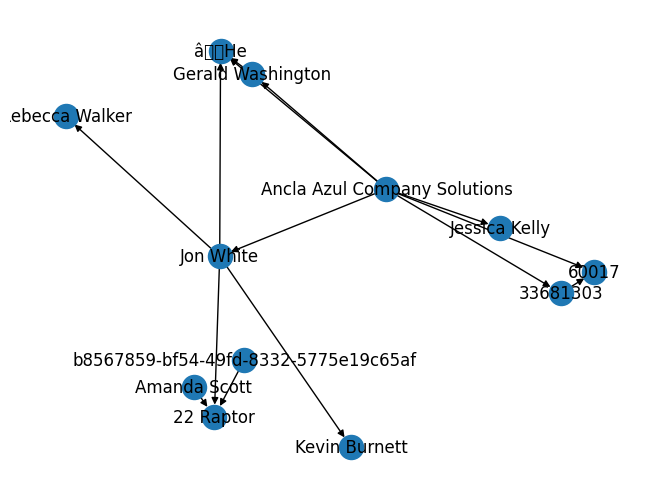

In [20]:
import matplotlib.pyplot as plt

# Get the subgraph for the entity "Mar de la Vida OJSC"
H = G.subgraph(G.neighbors("Mar de la Vida OJSC"))

# Draw the subgraph
nx.draw(H, with_labels=True)
plt.show()


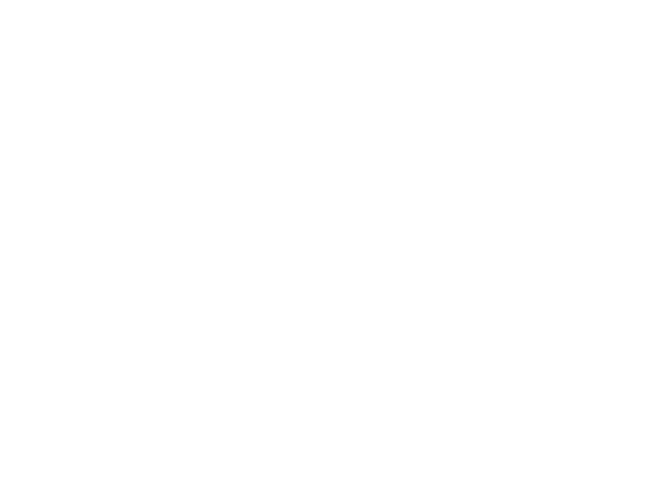

In [24]:
import matplotlib.pyplot as plt

# Get the subgraph for the entity "Mar de la Vida OJSC"
H = G.subgraph(G.neighbors("Oceanfront Oasis Inc Carriers"))

# Draw the subgraph
nx.draw(H, with_labels=True)
plt.show()


In [ ]:
from collections import Counter

# Count the types of edges connected to the entity "Mar de la Vida OJSC"
Counter([link['type'] for link in data['links'] if link['source'] == "Mar de la Vida OJSC"])


Counter({'partnership': 2,
         'ownership': 1,
         'membership': 7,
         'family_relationship': 2})

In [ ]:
print('commit')

commit
